In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

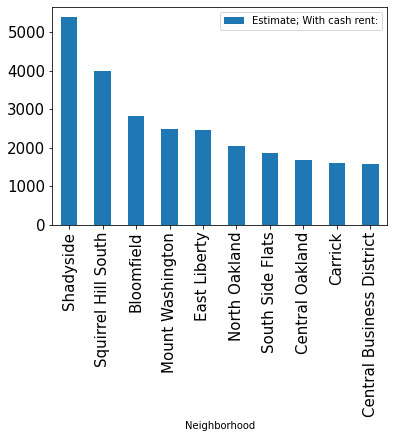

In [3]:
contract_rent_pandas = pd.read_csv("contract-rent.csv", 
                                       index_col="Neighborhood")

contract_rent_pandas["Estimate; With cash rent:"].sort_values(ascending = False).head(10).plot.bar()
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

['Estimate; With cash rent: - $200 to $249', 'Estimate; With cash rent: - $550 to $599', 'Estimate; With cash rent: - $800 to $899', 'Estimate; With cash rent: - $250 to $299', 'Estimate; With cash rent: - $300 to $349', 'Estimate; With cash rent: - $150 to $199', 'Estimate; With cash rent: - $600 to $649', 'Estimate; With cash rent: - $400 to $449', 'Estimate; With cash rent: - $900 to $999', 'Estimate; With cash rent: - $450 to $499', 'Estimate; With cash rent: - Less than $100', 'Estimate; With cash rent: - $650 to $699', 'Estimate; With cash rent: - $350 to $399', 'Estimate; With cash rent: - $700 to $749', 'Estimate; With cash rent: - $100 to $149', 'Estimate; With cash rent: - $750 to $799', 'Estimate; With cash rent: - $500 to $549']


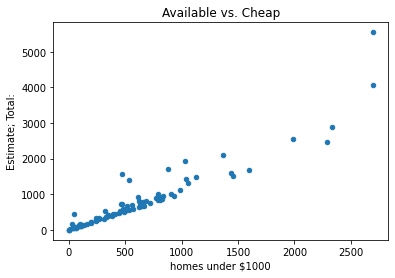

In [6]:
column_list = list(contract_rent_pandas)
columns_to_remove = ["Neighborhood" , "Id" , "Estimate; Total:" , "Margin of Error; Total:" , "Estimate; With cash rent:" , "Margin of Error; With cash rent:" , 
                    "Margin of Error; With cash rent: - Less than $100" , "Margin of Error; With cash rent: - $100 to $149" , "Margin of Error; With cash rent: - $150 to $199" , 
                    "Margin of Error; With cash rent: - $200 to $249" , "Margin of Error; With cash rent: - $250 to $299" , "Margin of Error; With cash rent: - $300 to $349" , 
                    "Margin of Error; With cash rent: - $350 to $399" , "Margin of Error; With cash rent: - $400 to $449" , "Margin of Error; With cash rent: - $450 to $499" , 
                    "Margin of Error; With cash rent: - $500 to $549" , "Margin of Error; With cash rent: - $550 to $599" , "Margin of Error; With cash rent: - $600 to $649" , 
                    "Margin of Error; With cash rent: - $650 to $699" , "Margin of Error; With cash rent: - $700 to $749" , "Margin of Error; With cash rent: - $750 to $799" , 
                    "Margin of Error; With cash rent: - $800 to $899" , "Margin of Error; With cash rent: - $900 to $999" , "Margin of Error; With cash rent: - $1,000 to $1,249" , 
                    "Margin of Error; With cash rent: - $1,250 to $1,499" , "Margin of Error; With cash rent: - $1,500 to $1,999" , "Margin of Error; With cash rent: - $2,000 to $2,499" , 
                    "Margin of Error; With cash rent: - $2,500 to $2,999" , "Margin of Error; With cash rent: - $3,000 to $3,499" , "Margin of Error; With cash rent: - $3,500 or more" , 
                    "Estimate; With cash rent: - $1,000 to $1,249" , "Estimate; With cash rent: - $1,250 to $1,499" , "Estimate; With cash rent: - $1,500 to $1,999" , 
                    "Estimate; With cash rent: - $2,000 to $2,499" , "Estimate; With cash rent: - $2,500 to $2,999" , "Estimate; With cash rent: - $3,000 to $3,499" , 
                    "Estimate; With cash rent: - $3,500 or more" , "Estimate; No cash rent" , "Margin of Error; No cash rent" , "homes under $1000"]

homes_under_1000 = list(set(column_list) - set(columns_to_remove))
print(homes_under_1000)


contract_rent_pandas["homes under $1000"] = contract_rent_pandas[homes_under_1000].sum(axis = 1)

contract_rent_pandas.plot(kind='scatter', x='homes under $1000', y='Estimate; Total:', title = "Available vs. Cheap")